In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.ticker as mk
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

import os #we will use the function listdir to list files in a folder
import math #to apply absolute value

## Define the problem:
Sports is collecting more and more data on each player, on each match. I believe every match and success of a player can be predicted if you carefully look at the data, and the progression of this data on a period of time. In tennis, you can look at data on wins/loss ratios, backhand and forehand success, serving success etc. 

### Our Model is differential

With this data, you should be able to predict who will win a Head to Head, and possibly the tournament. The power of this is that betting companies base their quotas not only on historical data, but also on what the masses bet on. This model hopes to only predict base on data and therefore not have any human bias.



<div style="background-color: lightblue ; padding: 10px;">
    <span style="color: black; font-size: 24px;">Load the Database</span>
    <br>
</div>

In [2]:
data = pd.read_csv("Ranking_stats_v2.csv")
data.head()

,Unnamed: 0,Ranking,Players,Atp_points,Ages,Turned Pro,Weight,height,W-L Year,W-L Career,Title Year,Title Career,Career High Date,Career High Rank,Year Price Money,Career Price Money,Aces,Double Faults,First Serves,First Serve Points Won,Second Serve Points Won,Break Points Faced,Break Points Saved,Service Games Played,Service Games Won,Total Service Points Won,1st Serve Return Points Won,2nd Serve Return Points Won,Break Points Opportunities,Break Points Converted,Return Games Played,Return Games Won,Return Points Won,Total Points Won
0,0,1,Carlos Alcaraz,"7,675",20,2018.0,163lbs(74kg),"6'0""(183cm)",40-4,130-35,5,11,Career High 2022.09.12,1,"$4,831,089","$16,660,732",567,368,65%,71%,55%,987,63%,"2,005",82%,65%,35%,53%,"1,521",42%,"2,010",32%,42%,53%
1,1,2,Novak Djokovic,"7,595",36,2003.0,170lbs(77kg),"6'2""(188cm)",27-4,1058-210,3,94,Career High 2011.07.04,1,"$5,070,668","$169,762,762","6,827","2,816",65%,74%,55%,"6,245",65%,"15,337",86%,67%,34%,55%,"10,796",44%,"14,905",32%,42%,55%
2,2,3,Daniil Medvedev,"5,890",27,2014.0,182lbs(83kg),"6'6""(198cm)",41-8,308-126,5,20,Career High 2022.02.28,1,"$4,895,309","$31,495,691","3,437","1,457",61%,75%,52%,"2,278",63%,"5,121",84%,66%,31%,54%,"3,261",43%,"5,129",27%,40%,53%
3,3,4,Casper Ruud,"4,960",24,2015.0,170lbs(77kg),"6'0""(183cm)",22-12,192-104,1,10,Career High 2022.09.12,2,"$2,340,478","$15,411,069","1,358",621,65%,72%,54%,"1,514",63%,"3,406",83%,66%,29%,51%,"1,968",40%,"3,330",24%,37%,52%
4,4,5,Stefanos Tsitsipas,"4,670",24,2016.0,198lbs(90kg),"6'4""(193cm)",32-12,281-131,0,9,Career High 2021.08.09,3,"$3,268,642","$26,467,649","2,889",904,62%,76%,55%,"2,049",65%,"5,229",86%,68%,29%,49%,"2,709",40%,"5,113",21%,36%,52%


<div style="background-color: lightblue ; padding: 10px;">
    <span style="color: black; font-size: 24px;">Basic Cleaning</span>
    <br>
</div>

In [3]:
data.columns = data.columns.str.lower().str.replace(" ", "_")
data = data.drop(columns=["unnamed:_0"])

In [4]:
data.head()

,ranking,players,atp_points,ages,turned_pro,weight,height,w-l_year,w-l_career,title_year,title_career,career_high_date,career_high_rank,year_price_money,career_price_money,aces,double_faults,first_serves,first_serve_points_won,second_serve_points_won,break_points_faced,break_points_saved,service_games_played,service_games_won,total_service_points_won,1st_serve_return_points_won,2nd_serve_return_points_won,break_points_opportunities,break_points_converted,return_games_played,return_games_won,return_points_won,total_points_won
0,1,Carlos Alcaraz,"7,675",20,2018.0,163lbs(74kg),"6'0""(183cm)",40-4,130-35,5,11,Career High 2022.09.12,1,"$4,831,089","$16,660,732",567,368,65%,71%,55%,987,63%,"2,005",82%,65%,35%,53%,"1,521",42%,"2,010",32%,42%,53%
1,2,Novak Djokovic,"7,595",36,2003.0,170lbs(77kg),"6'2""(188cm)",27-4,1058-210,3,94,Career High 2011.07.04,1,"$5,070,668","$169,762,762","6,827","2,816",65%,74%,55%,"6,245",65%,"15,337",86%,67%,34%,55%,"10,796",44%,"14,905",32%,42%,55%
2,3,Daniil Medvedev,"5,890",27,2014.0,182lbs(83kg),"6'6""(198cm)",41-8,308-126,5,20,Career High 2022.02.28,1,"$4,895,309","$31,495,691","3,437","1,457",61%,75%,52%,"2,278",63%,"5,121",84%,66%,31%,54%,"3,261",43%,"5,129",27%,40%,53%
3,4,Casper Ruud,"4,960",24,2015.0,170lbs(77kg),"6'0""(183cm)",22-12,192-104,1,10,Career High 2022.09.12,2,"$2,340,478","$15,411,069","1,358",621,65%,72%,54%,"1,514",63%,"3,406",83%,66%,29%,51%,"1,968",40%,"3,330",24%,37%,52%
4,5,Stefanos Tsitsipas,"4,670",24,2016.0,198lbs(90kg),"6'4""(193cm)",32-12,281-131,0,9,Career High 2021.08.09,3,"$3,268,642","$26,467,649","2,889",904,62%,76%,55%,"2,049",65%,"5,229",86%,68%,29%,49%,"2,709",40%,"5,113",21%,36%,52%


In [5]:
data.info

<bound method DataFrame.info of      ranking              players atp_points  ages  turned_pro        weight  \
0          1       Carlos Alcaraz      7,675    20      2018.0  163lbs(74kg)   
1          2       Novak Djokovic      7,595    36      2003.0  170lbs(77kg)   
2          3      Daniil Medvedev      5,890    27      2014.0  182lbs(83kg)   
3          4          Casper Ruud      4,960    24      2015.0  170lbs(77kg)   
4          5   Stefanos Tsitsipas      4,670    24      2016.0  198lbs(90kg)   
..       ...                  ...        ...   ...         ...           ...   
495      496   Gabi Adrian Boitan         77    23         NaN  180lbs(82kg)   
496      497       Joao Domingues         77    29      2013.0  154lbs(70kg)   
497      498       Fausto Tabacco         76    21         NaN  176lbs(80kg)   
498      499         Elmer Moller         76    20         NaN  160lbs(73kg)   
499      500  Jaimee Floyd Angele         76    23         NaN  206lbs(93kg)   

       

In [6]:
data.shape

(500, 33)

In [7]:
data.sample(10)

,ranking,players,atp_points,ages,turned_pro,weight,height,w-l_year,w-l_career,title_year,title_career,career_high_date,career_high_rank,year_price_money,career_price_money,aces,double_faults,first_serves,first_serve_points_won,second_serve_points_won,break_points_faced,break_points_saved,service_games_played,service_games_won,total_service_points_won,1st_serve_return_points_won,2nd_serve_return_points_won,break_points_opportunities,break_points_converted,return_games_played,return_games_won,return_points_won,total_points_won
3,4,Casper Ruud,"4,960",24,2015.0,170lbs(77kg),"6'0""(183cm)",22-12,192-104,1,10,Career High 2022.09.12,2,"$2,340,478","$15,411,069","1,358",621,65%,72%,54%,"1,514",63%,"3,406",83%,66%,29%,51%,"1,968",40%,"3,330",24%,37%,52%
217,218,Giovanni Mpetshi Perricard,268,20,2021.0,216lbs(98kg),"6'8""(203cm)",0-2,0-2,0,0,Career High 2023.06.26,216,"$106,270","$177,046",26,17,57%,78%,48%,17,71%,36,86%,65%,26%,43%,14,21%,37,8%,31%,48%
476,477,Ethan Quinn,84,19,2023.0,180lbs(82kg),"6'3""(191cm)",0-0,0-0,0,0,Career High 2022.12.19,454,"$4,330","$71,206",0,0,0%,0%,0%,0,0%,0,0%,0%,0%,0%,0,0%,0,0%,0%,0%
170,171,Hugo Dellien,340,30,2009.0,165lbs(75kg),"5'11""(180cm)",5-8,38-55,0,0,Career High 2022.08.01,64,"$292,437","$1,873,149",130,118,73%,62%,47%,602,57%,804,68%,58%,30%,50%,459,38%,800,22%,38%,48%
353,354,Yanki Erel,140,22,NaN,160lbs(73kg),"5'10""(178cm)",0-0,0-1,0,0,Career High 2023.06.19,346,"$16,744","$63,080",0,0,0%,0%,0%,0,0%,0,0%,0%,0%,0%,0,0%,0,0%,0%,0%
375,376,Luke Saville,127,29,2012.0,183lbs(83kg),"6'2""(188cm)",3-3,53-74,0,0,Career High 2015.02.23,23,"$37,566","$1,302,876",44,43,60%,64%,50%,86,60%,120,72%,59%,27%,42%,37,49%,123,15%,33%,46%
411,412,Max Hans Rehberg,111,19,NaN,176lbs(80kg),"6'0""(183cm)",0-1,0-3,0,0,Career High 2023.06.12,400,"$16,316","$60,684",2,12,65%,66%,36%,28,50%,39,64%,56%,30%,54%,21,33%,37,19%,38%,47%
12,13,Cameron Norrie,"2,610",27,2017.0,181lbs(82kg),"6'2""(188cm)",31-12,183-123,1,5,Career High 2022.09.12,8,"$1,581,870","$9,557,394","1,381",817,65%,70%,51%,"1,951",62%,"3,587",79%,63%,31%,51%,"2,127",42%,"3,580",25%,38%,51%
215,216,Gauthier Onclin,271,22,NaN,169lbs(77kg),"5'11""(180cm)",0-0,0-0,0,0,Career High 2023.06.12,202,"$78,340","$133,567",0,0,0%,0%,0%,0,0%,0,0%,0%,0%,0%,0,0%,0,0%,0%,0%
263,264,Michael Geerts,215,28,NaN,158lbs(72kg),"5'10""(178cm)",0-0,1-1,0,0,Career High 2023.04.03,162,"$7,825","$248,822",1,2,55%,57%,37%,5,20%,8,50%,48%,14%,57%,0,0%,8,0%,21%,35%


In [8]:
data["turned_pro"]= data["turned_pro"].apply(lambda x: str(x)[:4])


In [9]:
data["turned_pro"]

0      2018
1      2003
2      2014
3      2015
4      2016
       ... 
495     nan
496    2013
497     nan
498     nan
499     nan
Name: turned_pro, Length: 500, dtype: object

In [10]:
data.describe()

,ranking,ages,title_year,title_career,career_high_rank
count,500.000000,500.000000,500.00000,500.000000,500.000000
mean,250.500000,25.934000,0.07600,1.332000,171.106000
std,144.481833,4.461553,0.41782,6.742752,131.974366
min,1.000000,17.000000,0.00000,0.000000,1.000000
25%,125.750000,22.000000,0.00000,0.000000,55.750000
50%,250.500000,25.000000,0.00000,0.000000,147.500000
75%,375.250000,29.000000,0.00000,0.000000,267.000000
max,500.000000,41.000000,5.00000,94.000000,807.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ranking                      500 non-null    int64 
 1   players                      500 non-null    object
 2   atp_points                   500 non-null    object
 3   ages                         500 non-null    int64 
 4   turned_pro                   500 non-null    object
 5   weight                       493 non-null    object
 6   height                       492 non-null    object
 7   w-l_year                     500 non-null    object
 8   w-l_career                   500 non-null    object
 9   title_year                   500 non-null    int64 
 10  title_career                 500 non-null    int64 
 11  career_high_date             500 non-null    object
 12  career_high_rank             500 non-null    int64 
 13  year_price_money             496 no

In [12]:
numeric = data.select_dtypes(include = "number")

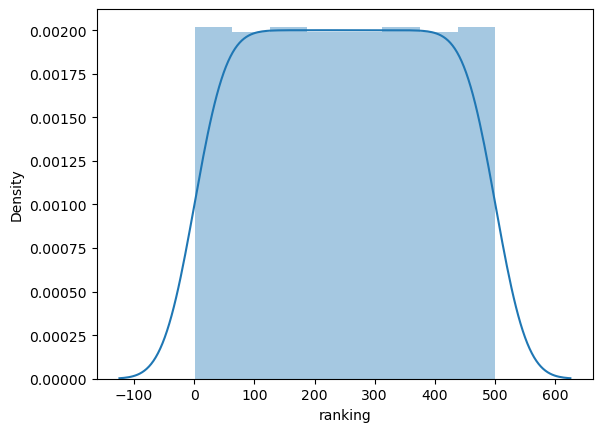

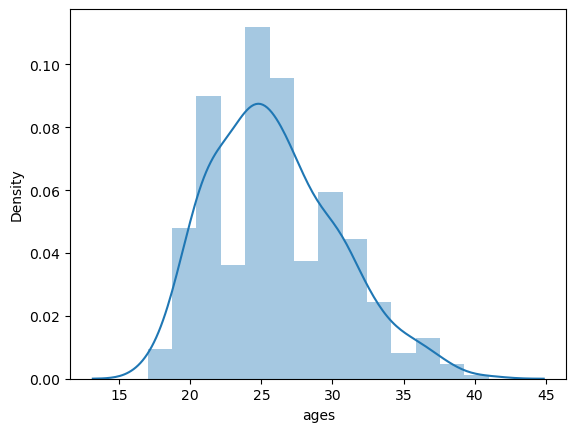

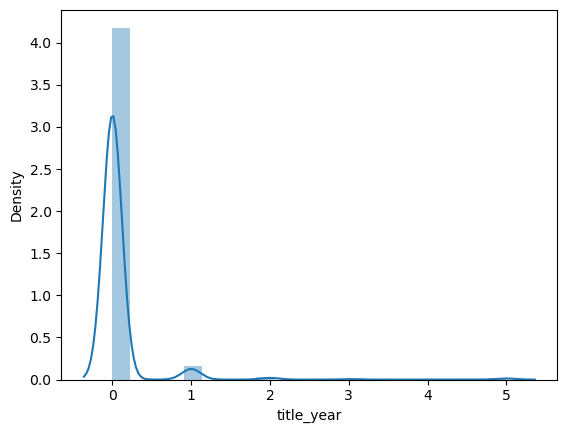

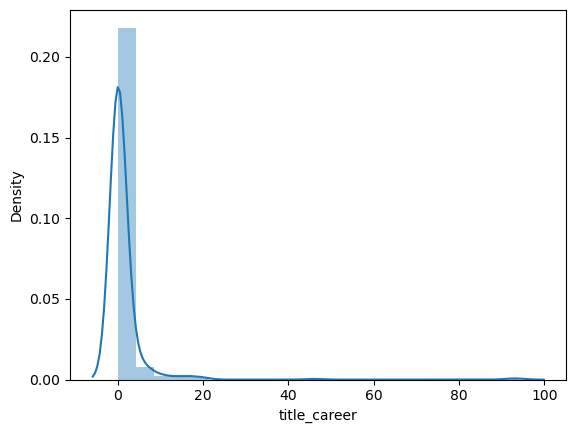

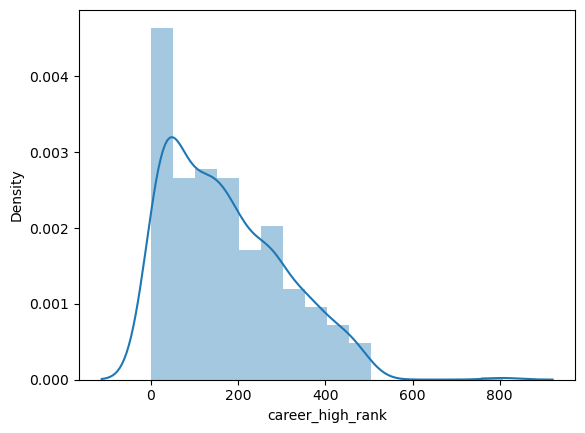

In [13]:
for column in numeric.columns:
    sns.distplot(data[column])
    plt.show()

### Checking for Multicolinearity and Relation with Target Variable


In [14]:
data

,ranking,players,atp_points,ages,turned_pro,weight,height,w-l_year,w-l_career,title_year,title_career,career_high_date,career_high_rank,year_price_money,career_price_money,aces,double_faults,first_serves,first_serve_points_won,second_serve_points_won,break_points_faced,break_points_saved,service_games_played,service_games_won,total_service_points_won,1st_serve_return_points_won,2nd_serve_return_points_won,break_points_opportunities,break_points_converted,return_games_played,return_games_won,return_points_won,total_points_won
0,1,Carlos Alcaraz,"7,675",20,2018,163lbs(74kg),"6'0""(183cm)",40-4,130-35,5,11,Career High 2022.09.12,1,"$4,831,089","$16,660,732",567,368,65%,71%,55%,987,63%,"2,005",82%,65%,35%,53%,"1,521",42%,"2,010",32%,42%,53%
1,2,Novak Djokovic,"7,595",36,2003,170lbs(77kg),"6'2""(188cm)",27-4,1058-210,3,94,Career High 2011.07.04,1,"$5,070,668","$169,762,762","6,827","2,816",65%,74%,55%,"6,245",65%,"15,337",86%,67%,34%,55%,"10,796",44%,"14,905",32%,42%,55%
2,3,Daniil Medvedev,"5,890",27,2014,182lbs(83kg),"6'6""(198cm)",41-8,308-126,5,20,Career High 2022.02.28,1,"$4,895,309","$31,495,691","3,437","1,457",61%,75%,52%,"2,278",63%,"5,121",84%,66%,31%,54%,"3,261",43%,"5,129",27%,40%,53%
3,4,Casper Ruud,"4,960",24,2015,170lbs(77kg),"6'0""(183cm)",22-12,192-104,1,10,Career High 2022.09.12,2,"$2,340,478","$15,411,069","1,358",621,65%,72%,54%,"1,514",63%,"3,406",83%,66%,29%,51%,"1,968",40%,"3,330",24%,37%,52%
4,5,Stefanos Tsitsipas,"4,670",24,2016,198lbs(90kg),"6'4""(193cm)",32-12,281-131,0,9,Career High 2021.08.09,3,"$3,268,642","$26,467,649","2,889",904,62%,76%,55%,"2,049",65%,"5,229",86%,68%,29%,49%,"2,709",40%,"5,113",21%,36%,52%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Gabi Adrian Boitan,77,23,nan,180lbs(82kg),"6'1""(185cm)",0-0,1-1,0,0,Career High 2023.05.22,490,"$10,478","$29,501",0,0,0%,0%,0%,0,0%,0,0%,0%,0%,0%,0,0%,0,0%,0%,0%
496,497,Joao Domingues,77,29,2013,154lbs(70kg),NaN,0-0,9-7,0,0,Career High 2020.02.24,150,"$8,501","$512,413",16,7,70%,62%,47%,92,62%,127,72%,58%,31%,47%,75,37%,130,22%,37%,47%
497,498,Fausto Tabacco,76,21,nan,176lbs(80kg),"6'0""(183cm)",0-0,0-0,0,0,Career High 2023.06.26,488,"$9,249","$28,527",0,0,0%,0%,0%,0,0%,0,0%,0%,0%,0%,0,0%,0,0%,0%,0%
498,499,Elmer Moller,76,20,nan,160lbs(73kg),"6'0""(183cm)",0-1,1-2,0,0,Career High 2023.06.26,489,"$10,141","$20,369",0,0,0%,0%,0%,0,0%,0,0%,0%,0%,0%,0,0%,0,0%,0%,0%


### Dealing with empty Values

In [15]:
data.isna()

,ranking,players,atp_points,ages,turned_pro,weight,height,w-l_year,w-l_career,title_year,title_career,career_high_date,career_high_rank,year_price_money,career_price_money,aces,double_faults,first_serves,first_serve_points_won,second_serve_points_won,break_points_faced,break_points_saved,service_games_played,service_games_won,total_service_points_won,1st_serve_return_points_won,2nd_serve_return_points_won,break_points_opportunities,break_points_converted,return_games_played,return_games_won,return_points_won,total_points_won
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Converting Data Types

In [16]:
data["year_price_money"] = data["year_price_money"].str.replace('$', '').str.replace(',', '')


In [17]:
data["year_price_money"] = data["year_price_money"].fillna(0).astype(int)

### Changing the Data Types of Columns

In [18]:
data["aces"] = data["aces"].str.replace(',', '').fillna(0).astype(int)
data["career_price_money"] = data["career_price_money"].str.replace('$', '').str.replace(',', '').fillna(0).astype(int)
data["double_faults"] = data["double_faults"].str.replace(',', '').fillna(0).astype(int)
data["first_serves"] = data["first_serves"].str.replace('%', '').fillna(0).astype(int)
data["first_serve_points_won"] = data["first_serve_points_won"].str.replace('%', '').fillna(0).astype(int)
data["second_serve_points_won"] = data["second_serve_points_won"].str.replace('%', '').fillna(0).astype(int)
data["break_points_faced"] = data["break_points_faced"].str.replace(',', '').fillna(0).astype(int)
data["break_points_saved"] = data["break_points_saved"].str.replace('%', '').fillna(0).astype(int)
data["service_games_played"] = data["service_games_played"].str.replace(',', '').fillna(0).astype(int)
data["service_games_won"] = data["service_games_won"].str.replace('%', '').fillna(0).astype(int)
data["total_service_points_won"] = data["total_service_points_won"].str.replace('%', '').fillna(0).astype(int)
data["1st_serve_return_points_won"] = data["1st_serve_return_points_won"].str.replace('%', '').fillna(0).astype(int)
data["2nd_serve_return_points_won"] = data["2nd_serve_return_points_won"].str.replace('%', '').fillna(0).astype(int)
data["break_points_opportunities"] = data["break_points_opportunities"].str.replace(',', '').fillna(0).astype(int)
data["break_points_converted"] = data["break_points_converted"].str.replace('%', '').fillna(0).astype(int)
data["return_games_played"] = data["return_games_played"].str.replace(',', '').fillna(0).astype(int)
data["return_games_won"] = data["return_games_won"].str.replace('%', '').fillna(0).astype(int)
data["return_points_won"] = data["return_points_won"].str.replace('%', '').fillna(0).astype(int)
data["total_points_won"] = data["total_points_won"].str.replace('%', '').fillna(0).astype(int)






### Separating wins/losses to create a ratio

In [19]:

data[['w-year', 'l-year']] = data['w-l_year'].str.split('-', expand=True)

In [20]:
data[['w-career', 'l-career']] = data['w-l_career'].str.split('-', expand=True)

In [21]:
data["w-year"] = data["w-year"].fillna(0).astype(int)
data["l-year"] = data["l-year"].fillna(0).astype(int)
data["w-career"] = data["w-career"].fillna(0).astype(int)
data["l-career"] = data["l-career"].fillna(0).astype(int)


In [22]:
data['w/l_year_final'] = np.where(data['l-year'] != 0, data['w-year'] / data['l-year'], 0)
data['w/l_career_final'] = np.where(data['l-career'] != 0, data['w-career'] / data['l-career'], 0)

In [23]:
data['w/l_year_final']= data['w/l_year_final'].astype(int)
data['w/l_career_final']= data['w/l_career_final'].astype(int)

In [24]:
data["atp_points"] = data["atp_points"].str.replace(',', '').fillna(0).astype(int)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ranking                      500 non-null    int64 
 1   players                      500 non-null    object
 2   atp_points                   500 non-null    int64 
 3   ages                         500 non-null    int64 
 4   turned_pro                   500 non-null    object
 5   weight                       493 non-null    object
 6   height                       492 non-null    object
 7   w-l_year                     500 non-null    object
 8   w-l_career                   500 non-null    object
 9   title_year                   500 non-null    int64 
 10  title_career                 500 non-null    int64 
 11  career_high_date             500 non-null    object
 12  career_high_rank             500 non-null    int64 
 13  year_price_money             500 no

In [26]:
data

,ranking,players,atp_points,ages,turned_pro,weight,height,w-l_year,w-l_career,title_year,title_career,career_high_date,career_high_rank,year_price_money,career_price_money,aces,double_faults,first_serves,first_serve_points_won,second_serve_points_won,break_points_faced,break_points_saved,service_games_played,service_games_won,total_service_points_won,1st_serve_return_points_won,2nd_serve_return_points_won,break_points_opportunities,break_points_converted,return_games_played,return_games_won,return_points_won,total_points_won,w-year,l-year,w-career,l-career,w/l_year_final,w/l_career_final
0,1,Carlos Alcaraz,7675,20,2018,163lbs(74kg),"6'0""(183cm)",40-4,130-35,5,11,Career High 2022.09.12,1,4831089,16660732,567,368,65,71,55,987,63,2005,82,65,35,53,1521,42,2010,32,42,53,40,4,130,35,10,3
1,2,Novak Djokovic,7595,36,2003,170lbs(77kg),"6'2""(188cm)",27-4,1058-210,3,94,Career High 2011.07.04,1,5070668,169762762,6827,2816,65,74,55,6245,65,15337,86,67,34,55,10796,44,14905,32,42,55,27,4,1058,210,6,5
2,3,Daniil Medvedev,5890,27,2014,182lbs(83kg),"6'6""(198cm)",41-8,308-126,5,20,Career High 2022.02.28,1,4895309,31495691,3437,1457,61,75,52,2278,63,5121,84,66,31,54,3261,43,5129,27,40,53,41,8,308,126,5,2
3,4,Casper Ruud,4960,24,2015,170lbs(77kg),"6'0""(183cm)",22-12,192-104,1,10,Career High 2022.09.12,2,2340478,15411069,1358,621,65,72,54,1514,63,3406,83,66,29,51,1968,40,3330,24,37,52,22,12,192,104,1,1
4,5,Stefanos Tsitsipas,4670,24,2016,198lbs(90kg),"6'4""(193cm)",32-12,281-131,0,9,Career High 2021.08.09,3,3268642,26467649,2889,904,62,76,55,2049,65,5229,86,68,29,49,2709,40,5113,21,36,52,32,12,281,131,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Gabi Adrian Boitan,77,23,nan,180lbs(82kg),"6'1""(185cm)",0-0,1-1,0,0,Career High 2023.05.22,490,10478,29501,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
496,497,Joao Domingues,77,29,2013,154lbs(70kg),NaN,0-0,9-7,0,0,Career High 2020.02.24,150,8501,512413,16,7,70,62,47,92,62,127,72,58,31,47,75,37,130,22,37,47,0,0,9,7,0,1
497,498,Fausto Tabacco,76,21,nan,176lbs(80kg),"6'0""(183cm)",0-0,0-0,0,0,Career High 2023.06.26,488,9249,28527,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
498,499,Elmer Moller,76,20,nan,160lbs(73kg),"6'0""(183cm)",0-1,1-2,0,0,Career High 2023.06.26,489,10141,20369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0


In [27]:
data.columns

Index(['ranking', 'players', 'atp_points', 'ages', 'turned_pro', 'weight',
       'height', 'w-l_year', 'w-l_career', 'title_year', 'title_career',
       'career_high_date', 'career_high_rank', 'year_price_money',
       'career_price_money', 'aces', 'double_faults', 'first_serves',
       'first_serve_points_won', 'second_serve_points_won',
       'break_points_faced', 'break_points_saved', 'service_games_played',
       'service_games_won', 'total_service_points_won',
       '1st_serve_return_points_won', '2nd_serve_return_points_won',
       'break_points_opportunities', 'break_points_converted',
       'return_games_played', 'return_games_won', 'return_points_won',
       'total_points_won', 'w-year', 'l-year', 'w-career', 'l-career',
       'w/l_year_final', 'w/l_career_final'],
      dtype='object')

In [28]:
features = ['ranking', 'atp_points', 'ages', 'title_year', 'title_career', 'year_price_money',
       'career_price_money', 'aces', 'double_faults', 'first_serves',
       'first_serve_points_won', 'second_serve_points_won',
       'break_points_faced', 'break_points_saved', 'service_games_played',
       'service_games_won', 'total_service_points_won',
       '1st_serve_return_points_won', '2nd_serve_return_points_won',
       'break_points_opportunities', 'break_points_converted',
       'return_games_played', 'return_games_won', 'return_points_won',
       'total_points_won', 'second_serve_points_won', 'w/l_year_final', 'w/l_career_final']

In [29]:
data["w/l_year_final"]= data["w/l_year_final"].fillna(0)
data["w/l_career_final"]= data["w/l_career_final"].fillna(0)

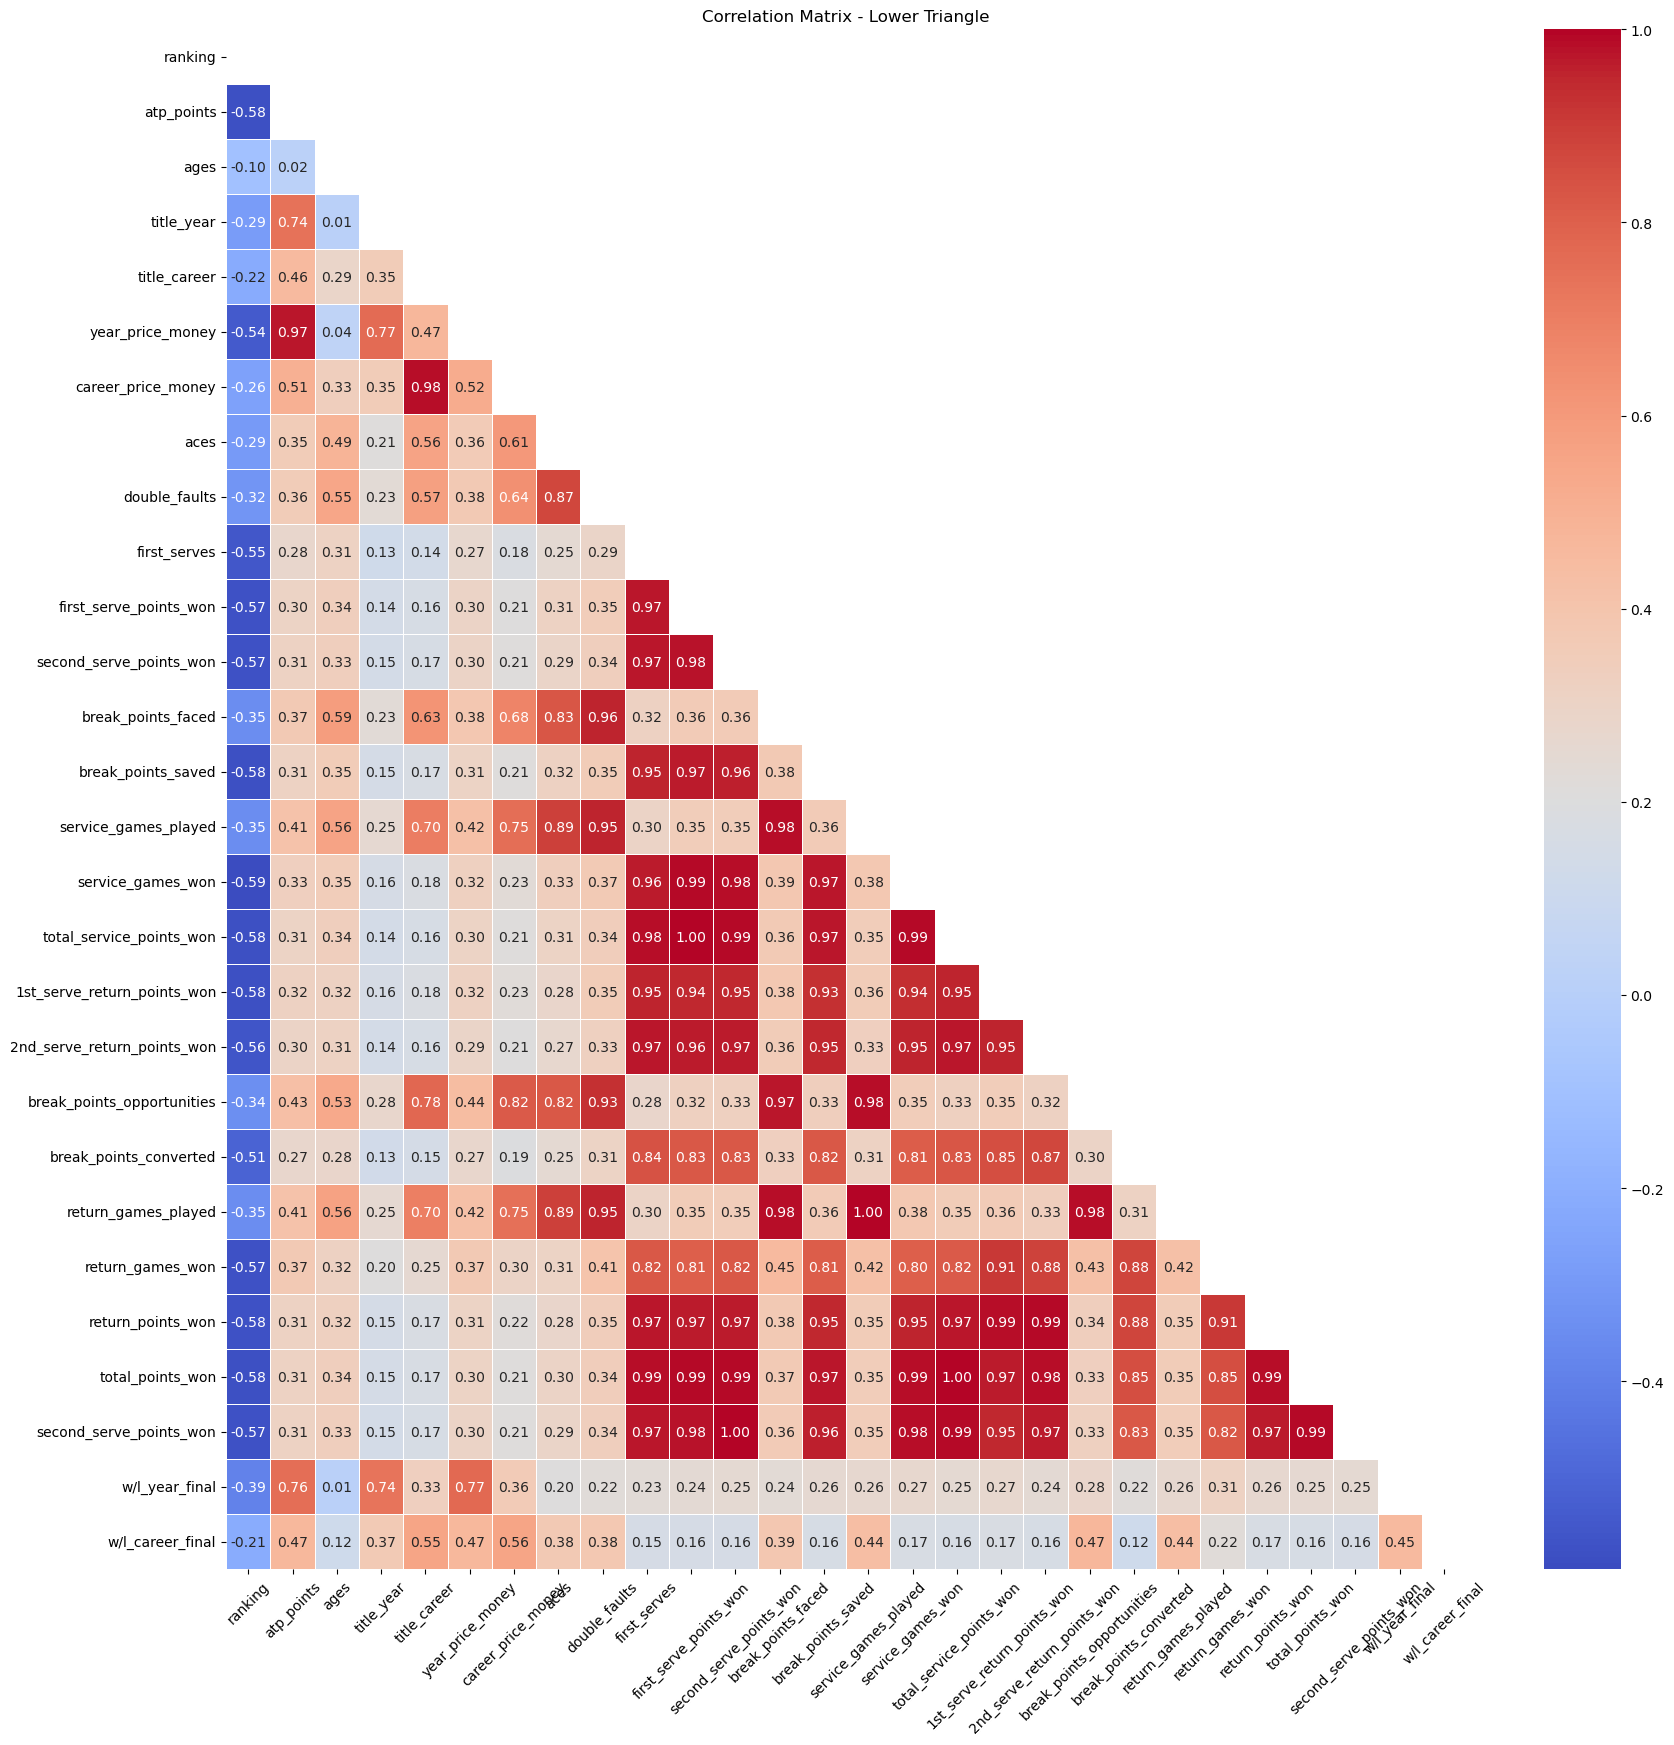

In [30]:
corr_matrix = data[features].corr()
corr_matrix

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, mask=mask, ax=ax)

ax.set_title("Correlation Matrix - Lower Triangle")

plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

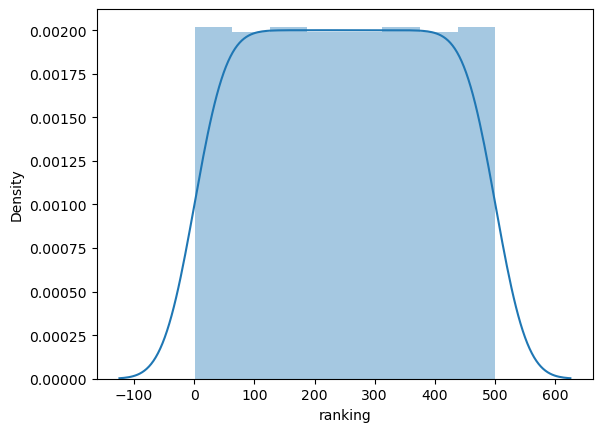

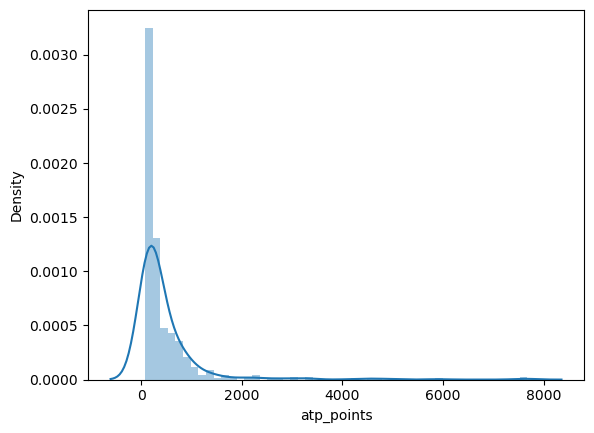

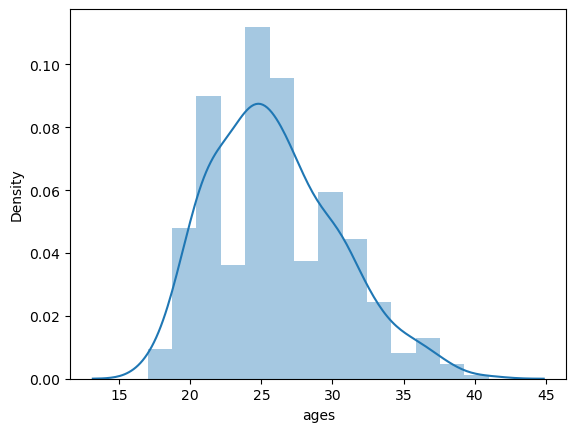

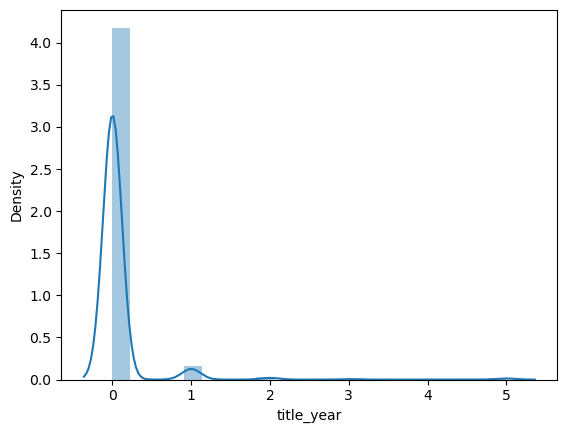

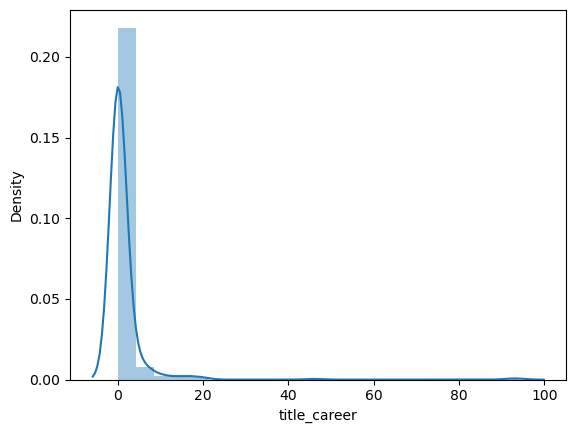

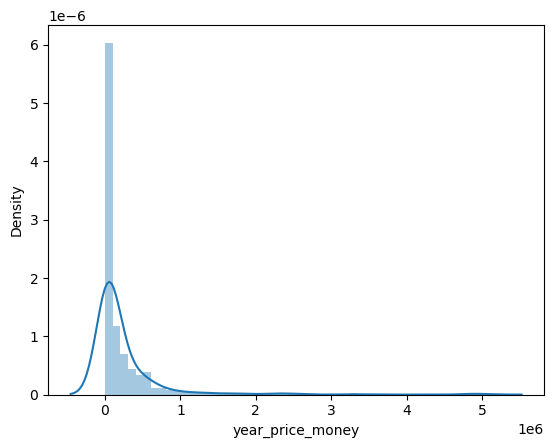

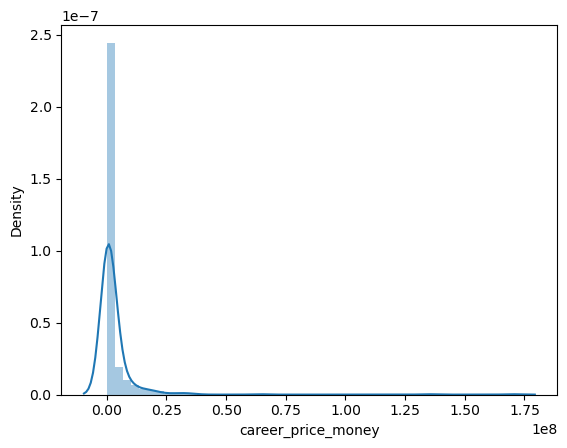

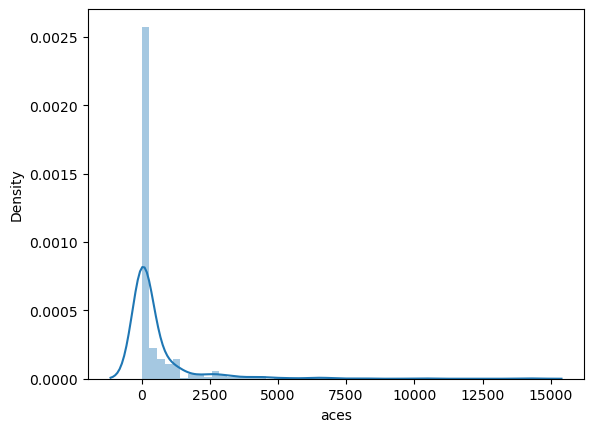

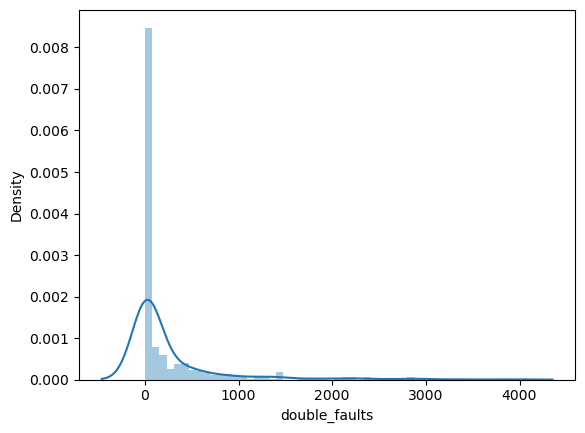

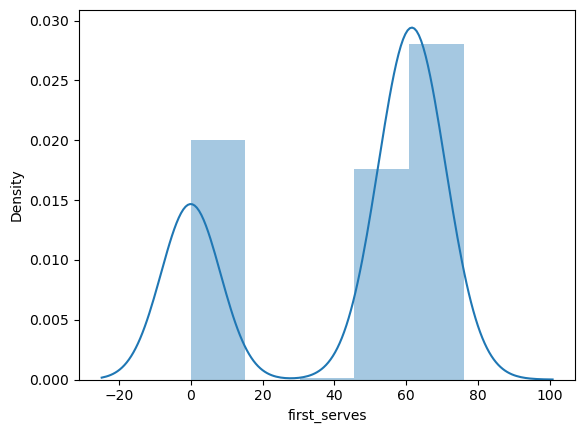

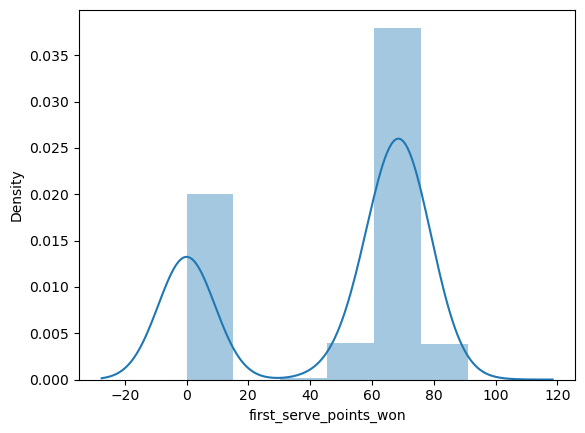

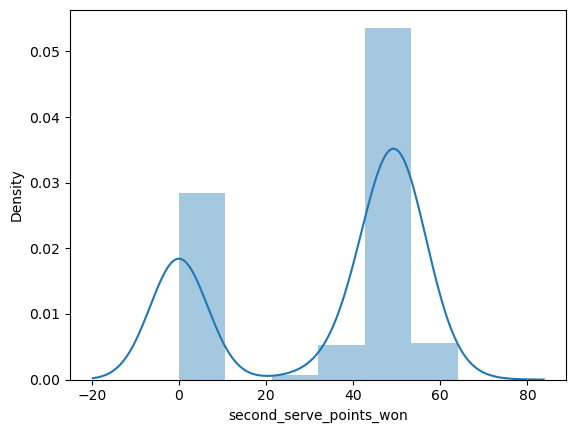

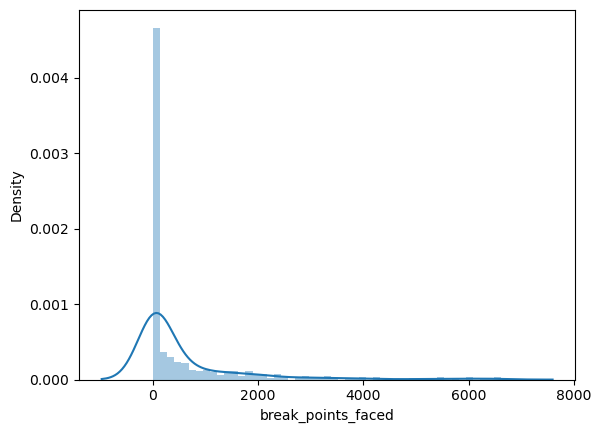

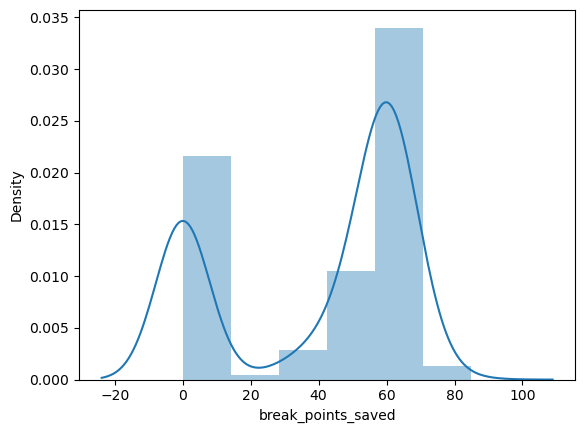

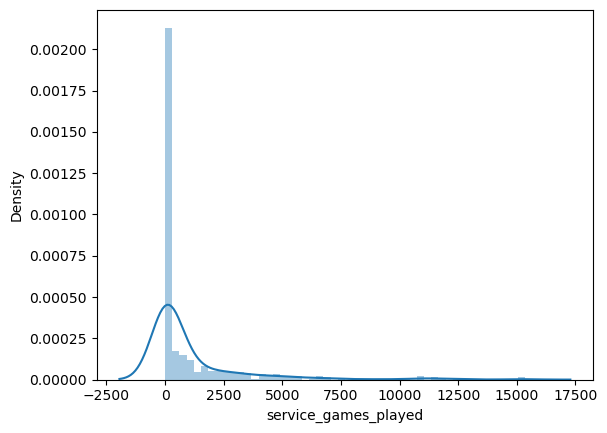

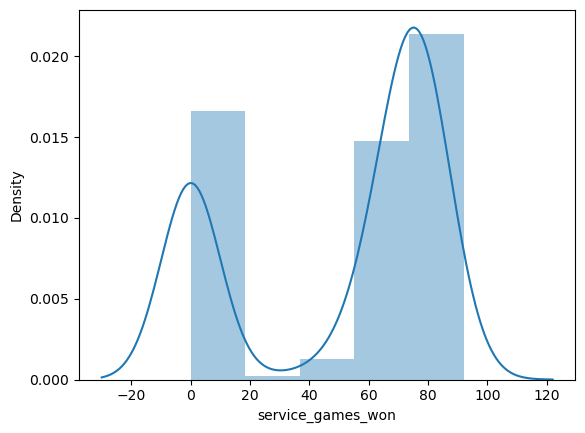

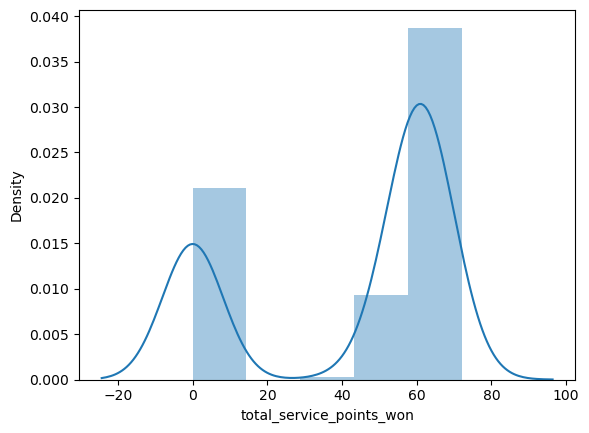

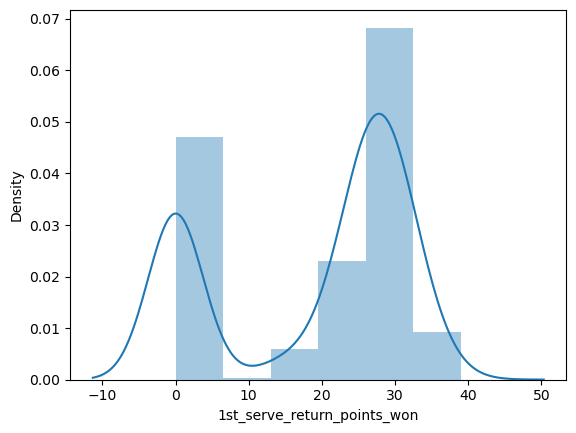

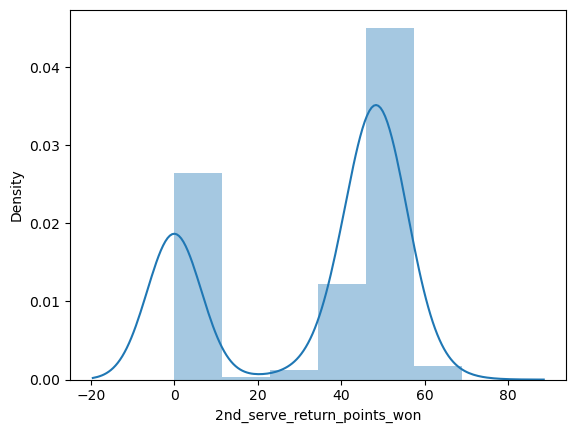

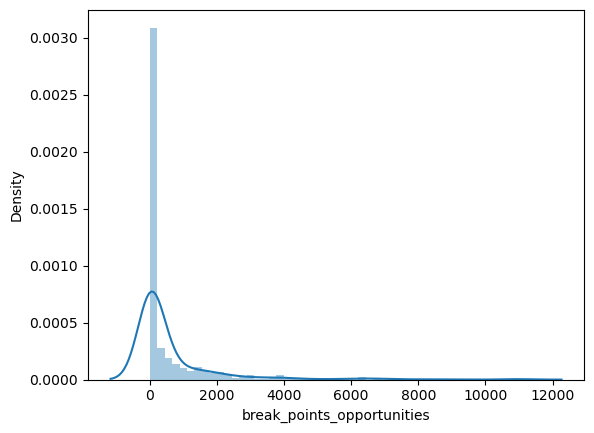

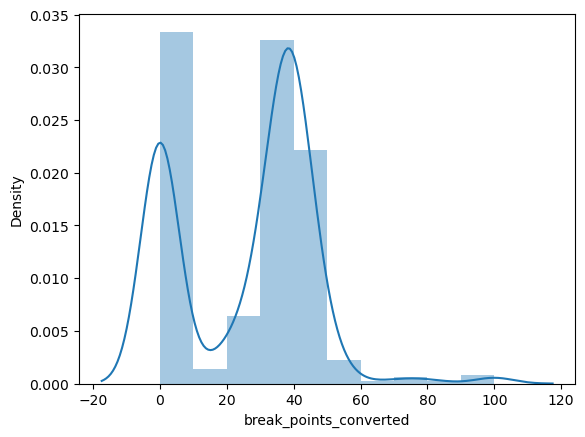

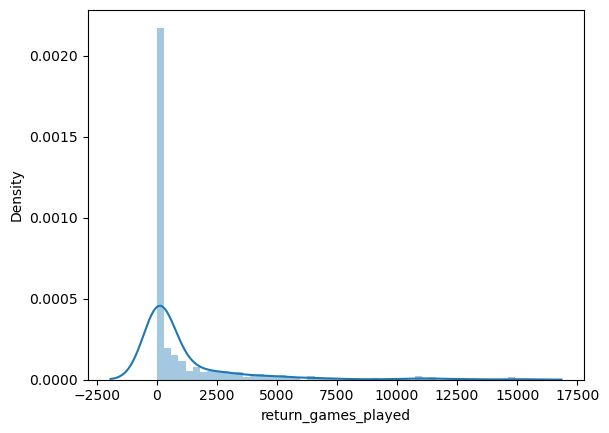

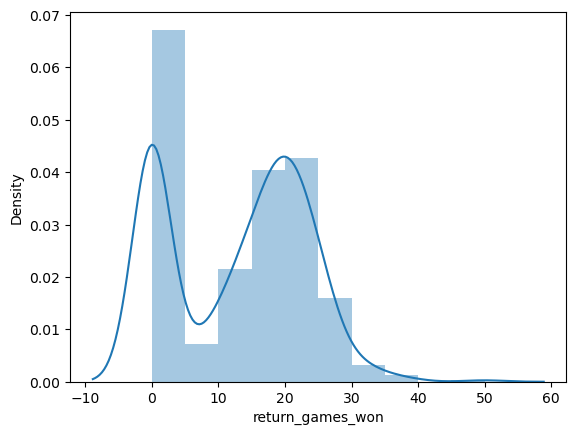

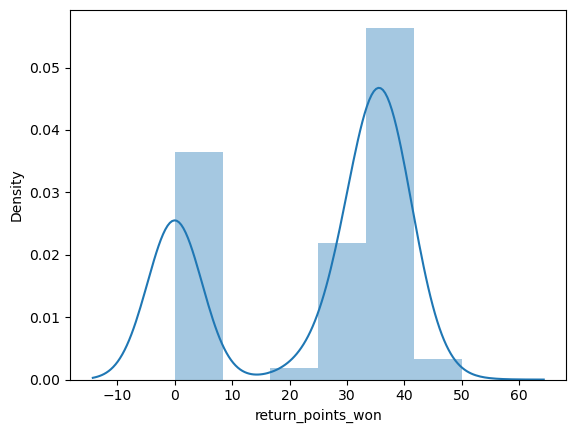

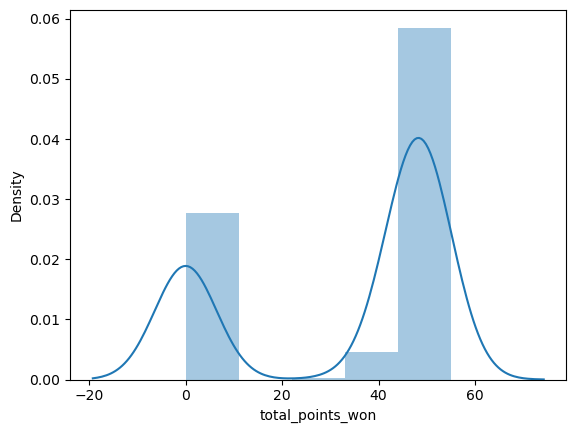

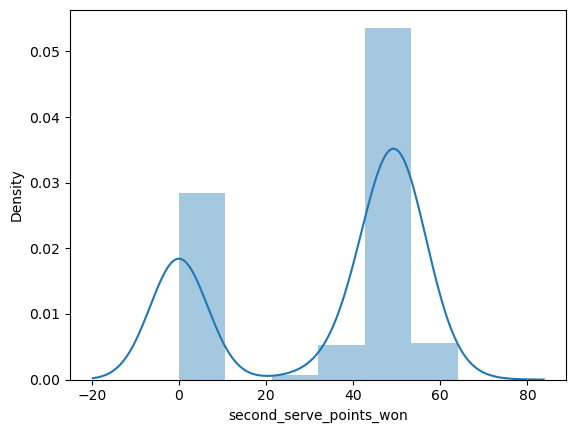

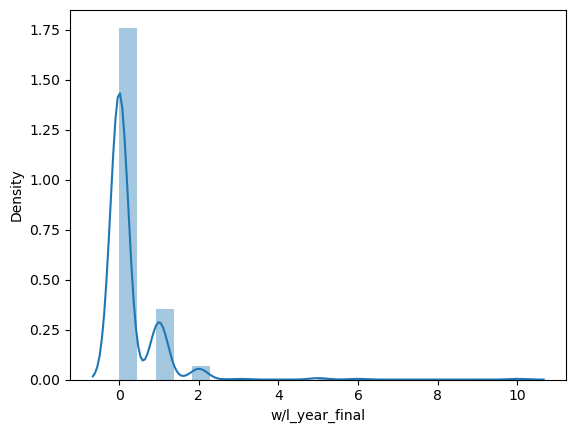

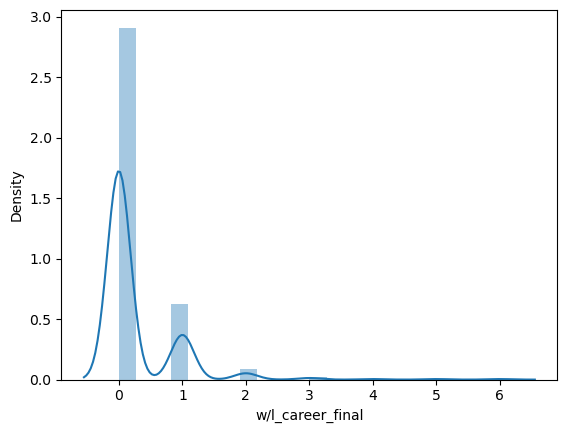

In [31]:
for column in features:
    sns.distplot(data[column])
    plt.show()

In [32]:
data

,ranking,players,atp_points,ages,turned_pro,weight,height,w-l_year,w-l_career,title_year,title_career,career_high_date,career_high_rank,year_price_money,career_price_money,aces,double_faults,first_serves,first_serve_points_won,second_serve_points_won,break_points_faced,break_points_saved,service_games_played,service_games_won,total_service_points_won,1st_serve_return_points_won,2nd_serve_return_points_won,break_points_opportunities,break_points_converted,return_games_played,return_games_won,return_points_won,total_points_won,w-year,l-year,w-career,l-career,w/l_year_final,w/l_career_final
0,1,Carlos Alcaraz,7675,20,2018,163lbs(74kg),"6'0""(183cm)",40-4,130-35,5,11,Career High 2022.09.12,1,4831089,16660732,567,368,65,71,55,987,63,2005,82,65,35,53,1521,42,2010,32,42,53,40,4,130,35,10,3
1,2,Novak Djokovic,7595,36,2003,170lbs(77kg),"6'2""(188cm)",27-4,1058-210,3,94,Career High 2011.07.04,1,5070668,169762762,6827,2816,65,74,55,6245,65,15337,86,67,34,55,10796,44,14905,32,42,55,27,4,1058,210,6,5
2,3,Daniil Medvedev,5890,27,2014,182lbs(83kg),"6'6""(198cm)",41-8,308-126,5,20,Career High 2022.02.28,1,4895309,31495691,3437,1457,61,75,52,2278,63,5121,84,66,31,54,3261,43,5129,27,40,53,41,8,308,126,5,2
3,4,Casper Ruud,4960,24,2015,170lbs(77kg),"6'0""(183cm)",22-12,192-104,1,10,Career High 2022.09.12,2,2340478,15411069,1358,621,65,72,54,1514,63,3406,83,66,29,51,1968,40,3330,24,37,52,22,12,192,104,1,1
4,5,Stefanos Tsitsipas,4670,24,2016,198lbs(90kg),"6'4""(193cm)",32-12,281-131,0,9,Career High 2021.08.09,3,3268642,26467649,2889,904,62,76,55,2049,65,5229,86,68,29,49,2709,40,5113,21,36,52,32,12,281,131,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Gabi Adrian Boitan,77,23,nan,180lbs(82kg),"6'1""(185cm)",0-0,1-1,0,0,Career High 2023.05.22,490,10478,29501,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
496,497,Joao Domingues,77,29,2013,154lbs(70kg),NaN,0-0,9-7,0,0,Career High 2020.02.24,150,8501,512413,16,7,70,62,47,92,62,127,72,58,31,47,75,37,130,22,37,47,0,0,9,7,0,1
497,498,Fausto Tabacco,76,21,nan,176lbs(80kg),"6'0""(183cm)",0-0,0-0,0,0,Career High 2023.06.26,488,9249,28527,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
498,499,Elmer Moller,76,20,nan,160lbs(73kg),"6'0""(183cm)",0-1,1-2,0,0,Career High 2023.06.26,489,10141,20369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0


### Creating the Model

In [33]:
X = data[['ages', 'title_year', 'title_career', 'year_price_money',
       'career_price_money', 'aces', 'double_faults', 'first_serves',
       'first_serve_points_won', 'second_serve_points_won',
       'break_points_faced', 'break_points_saved', 'service_games_played',
       'service_games_won', 'total_service_points_won',
       '1st_serve_return_points_won', '2nd_serve_return_points_won',
       'break_points_opportunities', 'break_points_converted',
       'return_games_played', 'return_games_won', 'return_points_won',
       'total_points_won', 'second_serve_points_won', 'w/l_year_final', 'w/l_career_final']]
y = data["atp_points"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [36]:
predictions = model.predict(X_test)
predictions

array([ 154.02252528,  675.12309467,  135.99061068,  295.82633421,
        525.59788226,  144.71315148,  159.74840907,  500.02839324,
        727.89775028,  139.27601896, 2920.37598178,  200.79446147,
        122.07512555,  603.1460155 ,  230.32850928,  167.12534421,
        137.52513517, 1737.88108888,  319.18173425,  129.4638833 ,
        141.63624652,  140.23928592,  221.25859114,  182.93164921,
        903.04329018,  132.27274979,  137.84271738,  222.35548485,
        723.92740499,  155.28579427,  128.326326  ,  129.43500295,
        155.3876666 ,  255.0447502 , 8080.43625276,  144.33729023,
        118.15246669,  580.21876628,  306.95360491,  562.68065425,
        179.7176939 ,  681.63761246,  137.88507623,  212.89120801,
       1446.71425314,  645.1223302 , 7879.59717191, 1302.35034118,
        139.45377482, 1334.02042854,  749.22934742,  236.51478259,
        409.27823427,  128.17650437,  325.36562575,  934.43372364,
        268.8858982 , 2245.87919183,  184.4780978 ,  791.13543

In [37]:
len(predictions)

150

In [38]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(comparison_df)

     Actual    Predicted
361     135   154.022525
73      761   675.123095
374     128   135.990611
155     371   295.826334
104     591   525.597882
..      ...          ...
266     209   192.979845
23     1430  1654.848174
222     262   352.475788
261     217    60.355029
426     103   356.739864

[150 rows x 2 columns]


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 71695.25967547792
Mean Absolute Error: 113.01868067159496
R-squared: 0.9094741944754342


### Trying the Model

In [40]:
features=['ages', 'title_year', 'title_career', 'year_price_money',
       'career_price_money', 'aces', 'double_faults', 'first_serves',
       'first_serve_points_won', 'second_serve_points_won',
       'break_points_faced', 'break_points_saved', 'service_games_played',
       'service_games_won', 'total_service_points_won',
       '1st_serve_return_points_won', '2nd_serve_return_points_won',
       'break_points_opportunities', 'break_points_converted',
       'return_games_played', 'return_games_won', 'return_points_won',
       'total_points_won', 'second_serve_points_won', 'w/l_year_final', 'w/l_career_final']

In [41]:
X.head()

,ages,title_year,title_career,year_price_money,career_price_money,aces,double_faults,first_serves,first_serve_points_won,second_serve_points_won,break_points_faced,break_points_saved,service_games_played,service_games_won,total_service_points_won,1st_serve_return_points_won,2nd_serve_return_points_won,break_points_opportunities,break_points_converted,return_games_played,return_games_won,return_points_won,total_points_won,second_serve_points_won,w/l_year_final,w/l_career_final
0,20,5,11,4831089,16660732,567,368,65,71,55,987,63,2005,82,65,35,53,1521,42,2010,32,42,53,55,10,3
1,36,3,94,5070668,169762762,6827,2816,65,74,55,6245,65,15337,86,67,34,55,10796,44,14905,32,42,55,55,6,5
2,27,5,20,4895309,31495691,3437,1457,61,75,52,2278,63,5121,84,66,31,54,3261,43,5129,27,40,53,52,5,2
3,24,1,10,2340478,15411069,1358,621,65,72,54,1514,63,3406,83,66,29,51,1968,40,3330,24,37,52,54,1,1
4,24,0,9,3268642,26467649,2889,904,62,76,55,2049,65,5229,86,68,29,49,2709,40,5113,21,36,52,55,2,2


In [42]:
data

,ranking,players,atp_points,ages,turned_pro,weight,height,w-l_year,w-l_career,title_year,title_career,career_high_date,career_high_rank,year_price_money,career_price_money,aces,double_faults,first_serves,first_serve_points_won,second_serve_points_won,break_points_faced,break_points_saved,service_games_played,service_games_won,total_service_points_won,1st_serve_return_points_won,2nd_serve_return_points_won,break_points_opportunities,break_points_converted,return_games_played,return_games_won,return_points_won,total_points_won,w-year,l-year,w-career,l-career,w/l_year_final,w/l_career_final
0,1,Carlos Alcaraz,7675,20,2018,163lbs(74kg),"6'0""(183cm)",40-4,130-35,5,11,Career High 2022.09.12,1,4831089,16660732,567,368,65,71,55,987,63,2005,82,65,35,53,1521,42,2010,32,42,53,40,4,130,35,10,3
1,2,Novak Djokovic,7595,36,2003,170lbs(77kg),"6'2""(188cm)",27-4,1058-210,3,94,Career High 2011.07.04,1,5070668,169762762,6827,2816,65,74,55,6245,65,15337,86,67,34,55,10796,44,14905,32,42,55,27,4,1058,210,6,5
2,3,Daniil Medvedev,5890,27,2014,182lbs(83kg),"6'6""(198cm)",41-8,308-126,5,20,Career High 2022.02.28,1,4895309,31495691,3437,1457,61,75,52,2278,63,5121,84,66,31,54,3261,43,5129,27,40,53,41,8,308,126,5,2
3,4,Casper Ruud,4960,24,2015,170lbs(77kg),"6'0""(183cm)",22-12,192-104,1,10,Career High 2022.09.12,2,2340478,15411069,1358,621,65,72,54,1514,63,3406,83,66,29,51,1968,40,3330,24,37,52,22,12,192,104,1,1
4,5,Stefanos Tsitsipas,4670,24,2016,198lbs(90kg),"6'4""(193cm)",32-12,281-131,0,9,Career High 2021.08.09,3,3268642,26467649,2889,904,62,76,55,2049,65,5229,86,68,29,49,2709,40,5113,21,36,52,32,12,281,131,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Gabi Adrian Boitan,77,23,nan,180lbs(82kg),"6'1""(185cm)",0-0,1-1,0,0,Career High 2023.05.22,490,10478,29501,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
496,497,Joao Domingues,77,29,2013,154lbs(70kg),NaN,0-0,9-7,0,0,Career High 2020.02.24,150,8501,512413,16,7,70,62,47,92,62,127,72,58,31,47,75,37,130,22,37,47,0,0,9,7,0,1
497,498,Fausto Tabacco,76,21,nan,176lbs(80kg),"6'0""(183cm)",0-0,0-0,0,0,Career High 2023.06.26,488,9249,28527,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
498,499,Elmer Moller,76,20,nan,160lbs(73kg),"6'0""(183cm)",0-1,1-2,0,0,Career High 2023.06.26,489,10141,20369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0


In [43]:
data.loc[data['players'] == 'Carlos Alcaraz', features]


,ages,title_year,title_career,year_price_money,career_price_money,aces,double_faults,first_serves,first_serve_points_won,second_serve_points_won,break_points_faced,break_points_saved,service_games_played,service_games_won,total_service_points_won,1st_serve_return_points_won,2nd_serve_return_points_won,break_points_opportunities,break_points_converted,return_games_played,return_games_won,return_points_won,total_points_won,second_serve_points_won,w/l_year_final,w/l_career_final
0,20,5,11,4831089,16660732,567,368,65,71,55,987,63,2005,82,65,35,53,1521,42,2010,32,42,53,55,10,3


In [44]:
model.predict(data.loc[data['players'] == 'Carlos Alcaraz', features])[0]

7879.597171905491

### Creating a function comparing two players

In [45]:
def player1_vs_player2():
    try:
        name1 = input("Enter the name of player 1: ")
        name2 = input("Enter the name of player 2: ")
        points_player1 = model.predict(data.loc[data['players'] == name1, features])[0]
        points_player2 = model.predict(data.loc[data['players'] == name2, features])[0]
        if points_player1 > points_player2:
            result_message = f"The winner of this epic match is \033[1m{name1}\033[0m"
        elif points_player2 > points_player1:
            result_message = f"The winner of this epic match is \033[1m{name2}\033[0m"
        print(result_message)
    except:
        print("Try again you stupid bitch")
    

Carlos Alcaraz
Novak Djokovic


<div style="background-color: lightblue ; padding: 10px;">
    <span style="color: black; font-size: 24px;">PLAYER 1 VS PLAYER 2</span>
    <br>
</div>

In [48]:
player1_vs_player2()

Enter the name of player 1: Alexander Zverev
Enter the name of player 2: Carlos Alcaraz
The winner of this epic match is Carlos Alcaraz


In [ ]:
### If the player has won a top 10 in that tournament, then he is more likely to win

In [ ]:
from selenium.webdriver.common.action_chains import ActionChains
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import time
from bs4 import BeautifulSoup
import pandas as pd
import requests
from bs4 import BeautifulSoup

from selenium.webdriver.common.by import By

players = ["Carlos Alcaraz", "Novak Djokovic", "Rafael Nadal", "Alexander Zverev"]

def get_head_to_head(player1, player2):
    webdriver_path = 'Google_Chrome'

    options = Options()
    options.add_argument('--enable-javascript')
    options.add_argument('--enable-cookies')

    driver_ran = webdriver.Chrome(service=Service(webdriver_path), options=options)

    driver_ran.get('https://www.atptour.com/en/players/atp-head-2-head/')

    driver_ran.implicitly_wait(10)

    search_bar_right = driver_ran.find_element(by=By.CSS_SELECTOR, value='.head-to-head-right .head-to-head-search-box')
    search_bar_left = driver_ran.find_element(by=By.CSS_SELECTOR, value='.head-to-head-left .head-to-head-search-box')
    search_bar_right.send_keys(f'{player1} vs {player2}')
    search_bar_left.send_keys(f'{player2} vs {player1}')
    search_bar_right.submit()
    search_bar_left.submit()

    page_source = driver_ran.page_source
    soup = BeautifulSoup(page_source, 'html.parser')
    response = requests.get(url)

    wins_element_right = soup.find("div", class_="head-to-head-right animate-slide").find("div", class_="head-to-head-wins")
    wins_element_left = soup.find("div", class_="head-to-head-left animate-slide").find("div", class_="head-to-head-wins")
    losses_element_right = soup.find("div", class_="head-to-head-right animate-slide").find("div", class_="head-to-head-losses")
    losses_element_left = soup.find("div", class_="head-to-head-left animate-slide").find("div", class_="head-to-head-losses")

    wins = wins_element_right["data-value"] if wins_element_right else None
    losses = losses_element_right["data-value"] if losses_element_right else None
    wins_left = wins_element_left["data-value"] if wins_element_left else None
    losses_left = losses_element_left["data-value"] if losses_element_left else None

    wins = max(wins, wins_left)
    losses = max(losses, losses_left)

    return wins, losses

wins_losses = {}
for player1 in players:
    for player2 in players:
        if player1 != player2:
            wins, losses = get_head_to_head(player1, player2)
            wins_losses[f"{player1}-{player2}"] = {"wins": wins, "losses": losses}

print(wins_losses)



In [ ]:
from selenium.webdriver.common.action_chains import ActionChains
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import time
from bs4 import BeautifulSoup
import pandas as pd
import requests
from bs4 import BeautifulSoup

from selenium.webdriver.common.by import By

players = ["Carlos Alcaraz", "Novak Djokovic", "Rafael Nadal", "Alexander Zverev"]

def get_head_to_head(player1, player2):
    webdriver_path = 'Google_Chrome'

    options = Options()
    options.add_argument('--enable-javascript')
    options.add_argument('--enable-cookies')

    driver_ran = webdriver.Chrome(service=Service(webdriver_path), options=options)

    driver_ran.get('https://www.atptour.com/en/players/atp-head-2-head/')

    driver_ran.implicitly_wait(10)

    search_bar_right = driver_ran.find_element(by=By.CSS_SELECTOR, value='.head-to-head-right .head-to-head-search-box')

    if not search_bar_right.is_enabled():
        raise Exception("Search bar is disabled")

    if not search_bar_right.is_focused():
        action = ActionChains(driver_ran)
        action.focus(search_bar_right).perform()

    search_bar_right.send_keys(f'{player1} vs {player2}')
    search_bar_right.submit()

    page_source = driver_ran.page_source
    soup = BeautifulSoup(page_source, 'html.parser')
    response = requests.get(url)

    wins_element_right = soup.find("div", class_="head-to-head-right animate-slide").find("div", class_="head-to-head-wins")
    wins_element_left = soup.find("div", class_="head-to-head-left animate-slide").find("div", class_="head-to-head-wins")
    losses_element_right = soup.find("div", class_="head-to-head-right animate-slide").find("div", class_="head-to-head-losses")
    losses_element_left = soup.find("div", class_="head-to-head-left animate-slide").find("div", class_="head-to-head-losses")

    wins = wins_element_right["data-value"] if wins_element_right else None
    losses = losses_element_right["data-value"] if losses_element_right else None
    wins_left = wins_element_left["data-value"] if wins_element_left else None
    losses_left = losses_element_left["data-value"] if losses_element_left else None

    wins = max(wins, wins_left)
    losses = max(losses, losses_left)

    return wins, losses

wins_losses = {}
for player1 in players:
    for player2 in players:
        if player1 != player2:
            try:
                wins, losses = get_head_to_head(player1, player2)
            except Exception as e:
                print(e)
                continue
            wins_losses[f"{player1}-{player2}"] = {"wins": wins, "losses": losses}

print(wins_losses)
